### Solving the Langevin Equation using a Monte Carlo method

The one-dimensional Langevin equation is given by:

$$
\frac{dv(t)}{dt} = -\gamma v(t) + \sigma \xi(t)
$$

Where $\xi(t)$ is a white noise term, often modeled as a Gaussian random variable with a mean of zero. It represents the random fluctuations experienced by the particle over time due to its interactions with the environment




In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [2]:
# Defining the parameters
gamma = 0.5
sigma = gamma / 50 # 2% of gamma

dt = 0.0005
T = 30.0
N = int(T / dt)

t = np.linspace(0, T, N)
v = np.zeros(N) 
x = np.zeros(N)

v[0] = 0.0
x[0] = 0.0

In [3]:
# Euler-Maruyama method
for i in range(1, N):
    Z = np.random.normal(0, 1)
    v[i] = v[i - 1] + (- gamma * v[i - 1] * dt + sigma * np.sqrt(dt) * Z)
    x[i] = x[i - 1] + v[i - 1] * dt

v *= 1000
x *= 1000

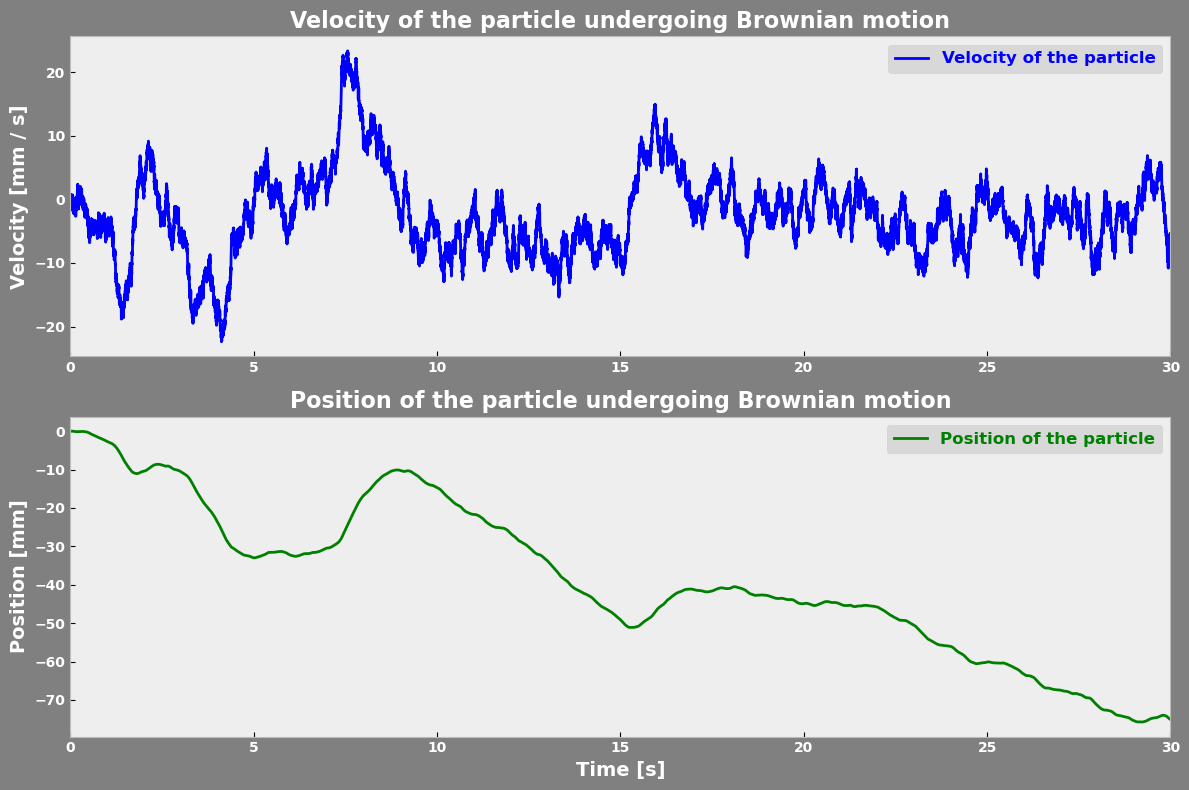

In [4]:
# Plotting the simulation
plt.figure(figsize=(12, 8), facecolor = "gray")

plt.subplot(2, 1, 1)
plt.plot(t, v, label = "Velocity of the particle", color = "blue")
plt.ylabel("Velocity [mm / s]", color = "white", fontweight = "bold", fontsize = 14)
plt.title("Velocity of the particle undergoing Brownian motion", color = "white", fontweight = "bold", fontsize = 16)
plt.xlim(0, T)
plt.xticks(fontweight = "bold", color = "white")
plt.yticks(fontweight = "bold", color = "white")
plt.legend(facecolor = "lightgray", fontsize = "large")
plt.setp(plt.gca().get_legend().get_texts(), weight = "bold", color = "blue")
plt.grid(False)

plt.subplot(2, 1, 2)
plt.plot(t, x, label = "Position of the particle", color = "green")
plt.xlabel("Time [s]", color = "white", fontweight = "bold", fontsize = 14)
plt.ylabel("Position [mm]", color = "white", fontweight = "bold", fontsize = 14)
plt.title("Position of the particle undergoing Brownian motion", color = "white", fontweight = "bold", fontsize = 16)
plt.xlim(0, T)
plt.xticks(fontweight = "bold", color = "white")
plt.yticks(fontweight = "bold", color = "white")
plt.legend(facecolor = "lightgray", fontsize = "large")
plt.setp(plt.gca().get_legend().get_texts(), weight = "bold", color = "green")
plt.grid(False)

plt.tight_layout()
plt.show()

In [5]:
# Number of simulations to run
num_runs = 300

In [6]:
# Running multiple simulations
v_total = np.zeros((num_runs, N))
x_total = np.zeros((num_runs, N))

for run in range(num_runs):
    v = np.zeros(N)
    x = np.zeros(N)  
    v[0] = 0.0       
    x[0] = 0.0    

    for i in range(1, N):
        Z = np.random.normal(0, 1) 
        v[i] = v[i-1] + (-gamma * v[i-1] * dt + sigma * np.sqrt(dt) * Z)
        x[i] = x[i-1] + v[i-1] * dt
    
    v *= 1000
    x *= 1000
    
    v_total[run] = v
    x_total[run] = x

In [7]:
# Calculating the average velocity and position over all runs
v_avg = np.mean(v_total, axis = 0)
x_avg = np.mean(x_total, axis = 0)

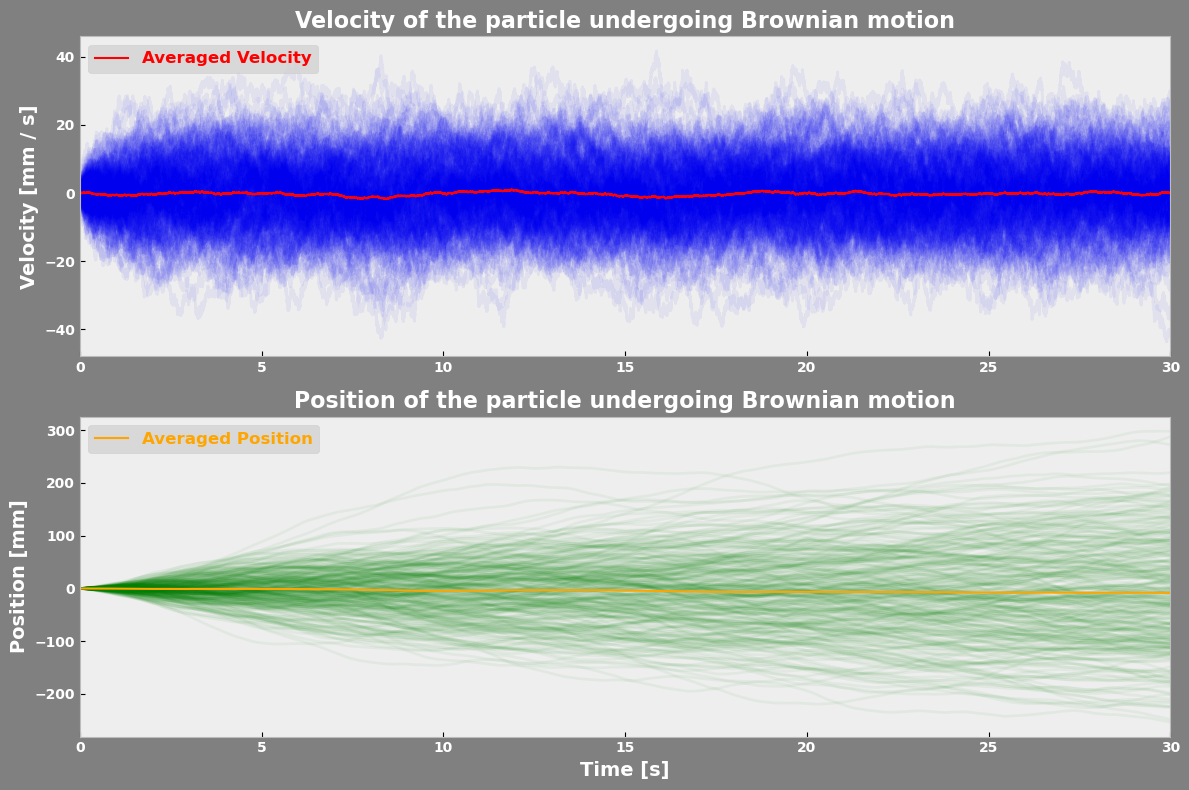

In [8]:
# Plotting the paths
t = np.linspace(0, T, N)

plt.figure(figsize = (12, 8), facecolor = "gray")

plt.subplot(2, 1, 1)
for run in range(num_runs):
    plt.plot(t, v_total[run], color = "blue", alpha = 0.05)

plt.plot(t, v_avg, color = "red", label = "Averaged Velocity", linewidth = 1.5)
plt.ylabel("Velocity [mm / s]", color = "white", fontweight = "bold", fontsize = 14)
plt.title("Velocity of the particle undergoing Brownian motion", color = "white", fontweight = "bold", fontsize = 16)
plt.xlim(0, T)
plt.xticks(fontweight = "bold", color = "white")
plt.yticks(fontweight = "bold", color = "white")
plt.legend(facecolor = "lightgray", fontsize = "large", loc = "upper left")
plt.setp(plt.gca().get_legend().get_texts(), weight = "bold", color = "red")
plt.grid(False)

plt.subplot(2, 1, 2)
for run in range(num_runs):
    plt.plot(t, x_total[run], color = "green", alpha = 0.05)

plt.plot(t, x_avg, color = "orange", label = "Averaged Position", linewidth = 1.5)
plt.xlabel("Time [s]", color = "white", fontweight = "bold", fontsize = 14)
plt.ylabel("Position [mm]", color = "white", fontweight = "bold", fontsize = 14)
plt.title("Position of the particle undergoing Brownian motion", color = "white", fontweight = "bold", fontsize = 16)
plt.xlim(0, T)
plt.xticks(fontweight = "bold", color = "white")
plt.yticks(fontweight = "bold", color = "white")
plt.legend(facecolor = "lightgray", fontsize = "large", loc = "upper left")
plt.setp(plt.gca().get_legend().get_texts(), weight = "bold", color = "orange")
plt.grid(False)

plt.tight_layout()
plt.show()

In [9]:
# Printing the mean averaged values
print(f"Averaged velocity: {np.mean(v_avg)} +- {np.std(v_avg)} mm - s")
print(f"Averaged position: {np.mean(x_avg)} +- {np.std(x_avg)} mm")

Averaged velocity: -0.2763322266136781 +- 0.4870706735593614 mm - s
Averaged position: -4.547952592050808 +- 2.6421538147200208 mm


<h3 style="text-align: center;">Let's now extend this code to solve the two-dimensional Langevin equation</h3>

In [10]:
v = np.zeros((N, 2))    # 2D velocity
x = np.zeros((N, 2))    # 2D position

v[0] = [0.0, 0.0] 
x[0] = [0.0, 0.0]  

# Euler-Maruyama method for 2D Langevin equation
for i in range(1, N):
    Z_x = np.random.normal(0, 1)  
    Z_y = np.random.normal(0, 1)  
    v[i, 0] = v[i - 1, 0] + (- gamma * v[i - 1, 0] * dt + sigma * np.sqrt(dt) * Z_x)
    v[i, 1] = v[i - 1, 1] + (- gamma * v[i - 1, 1] * dt + sigma * np.sqrt(dt) * Z_y)
    x[i, 0] = x[i - 1, 0] + v[i - 1, 0] * dt
    x[i, 1] = x[i - 1, 1] + v[i - 1, 1] * dt

v *= 1000 
x *= 1000  

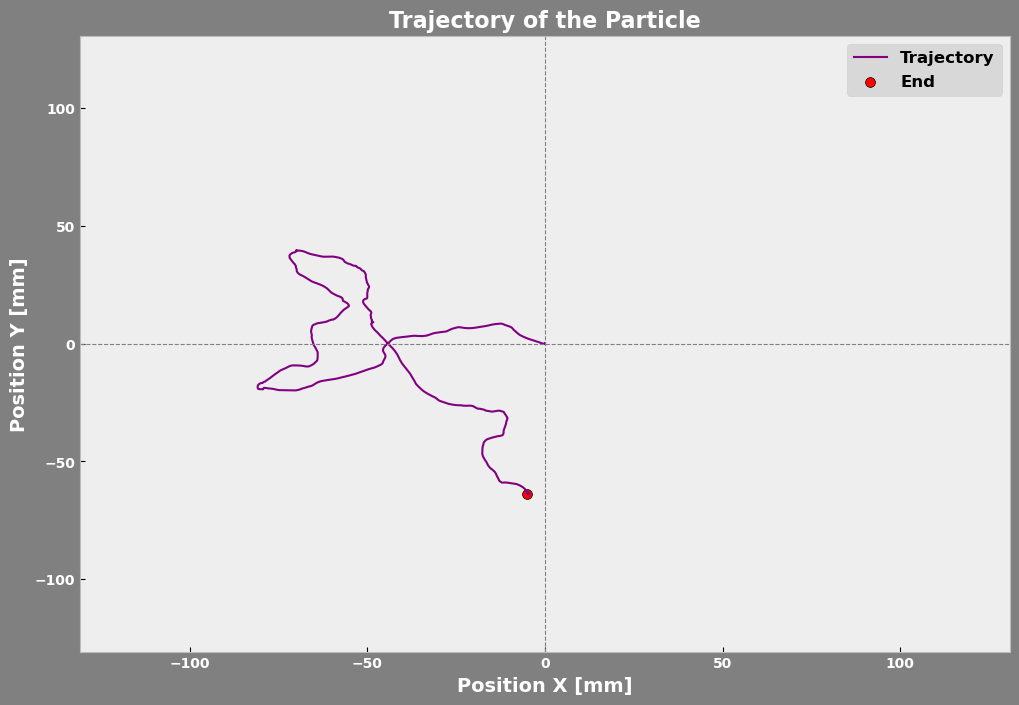

In [11]:
# Plotting the trajectory in the 2D plane
plt.figure(figsize = (12, 8), facecolor = "gray")

plt.plot(x[:, 0], x[:, 1], color = "purple", linewidth = 1.5 , label = "Trajectory")
plt.scatter(x[-1, 0], x[-1, 1], color = "red", s = 50, label = "End", edgecolor = "black")  # End point
plt.axhline(0, color = "gray", linewidth = 0.8, linestyle = "--")
plt.axvline(0, color = "gray", linewidth = 0.8, linestyle = "--")

# Setting limits to ensure the origin is at the center
max_extent = max(np.max(np.abs(x[:, 0])), np.max(np.abs(x[:, 1]))) + 50
plt.xlim(-max_extent, max_extent)
plt.ylim(-max_extent, max_extent)

plt.xlabel("Position X [mm]", color = "white", fontweight = "bold", fontsize = 14)
plt.ylabel("Position Y [mm]", color = "white", fontweight = "bold", fontsize = 14)
plt.title("Trajectory of the Particle", color = "white", fontweight = "bold", fontsize = 16)
plt.xticks(fontweight = "bold", color = "white")
plt.yticks(fontweight = "bold", color = "white")
plt.legend(facecolor = "lightgray", fontsize = "large")
plt.setp(plt.gca().get_legend().get_texts(), weight = "bold", color = "black")
plt.grid(False)

plt.show()

In [12]:
# Running multiple simulations
v_total = np.zeros((num_runs, N, 2))
x_total = np.zeros((num_runs, N, 2))

total_distance = np.zeros(num_runs)

for run in range(num_runs):
    v = np.zeros((N, 2))
    x = np.zeros((N, 2))
    v[0] = [0.0, 0.0]  
    x[0] = [0.0, 0.0]  

    for i in range(1, N):
        Z_x = np.random.normal(0, 1)  
        Z_y = np.random.normal(0, 1)  
        v[i, 0] = v[i - 1, 0] + (- gamma * v[i - 1, 0] * dt + sigma * np.sqrt(dt) * Z_x)
        v[i, 1] = v[i - 1, 1] + (- gamma * v[i - 1, 1] * dt + sigma * np.sqrt(dt) * Z_y)
        x[i, 0] = x[i - 1, 0] + v[i - 1, 0] * dt
        x[i, 1] = x[i - 1, 1] + v[i - 1, 1] * dt
    
    v *= 1000
    x *= 1000

    v_total[run] = v
    x_total[run] = x

    # Computing the distance
    total_distance[run] = np.sqrt(x_total[run, -1, 0] ** 2 + x_total[run, -1, 1] ** 2)

In [13]:
# Calculating the average velocity and position over all runs
v_avg = np.mean(v_total, axis = 0)
x_avg = np.mean(x_total, axis = 0)
avg_distance = np.mean(total_distance)
std_distance = np.std(total_distance)

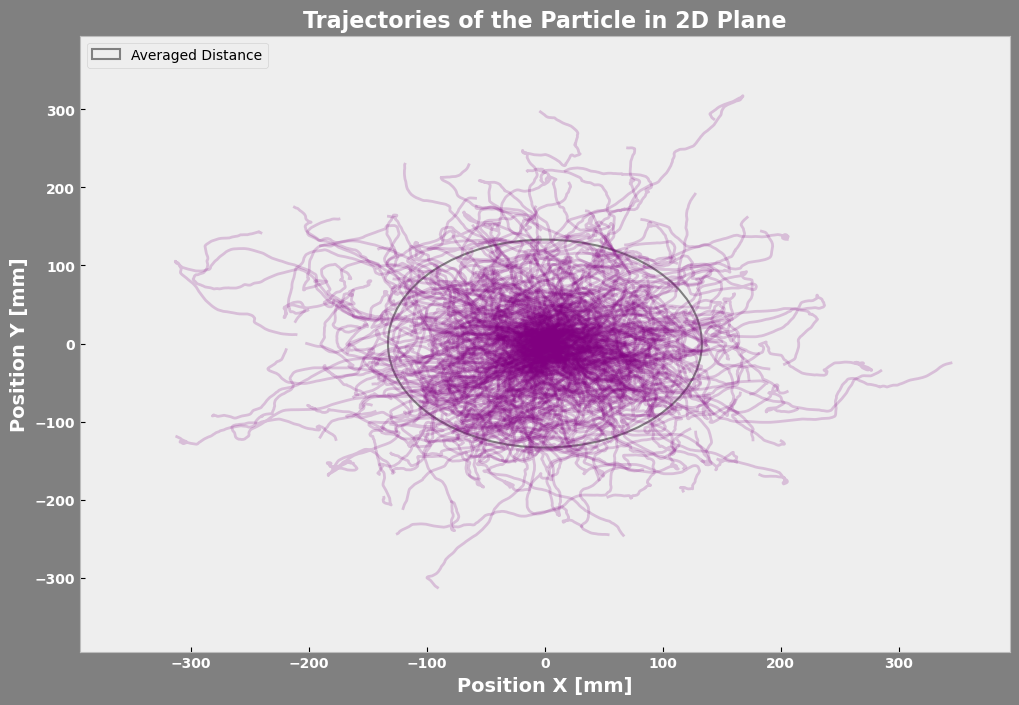

In [14]:
# Plotting the paths
plt.figure(figsize=(12, 8), facecolor="gray")

# 2D Trajectory plot
for run in range(num_runs):
    plt.plot(x_total[run, :, 0], x_total[run, :, 1], color = "purple", alpha=0.2)  

# Set limits to ensure the origin is at the center
max_extent = max(np.max(np.abs(x_total[:, :, 0])), np.max(np.abs(x_total[:, :, 1]))) + 50 
plt.xlim(-max_extent, max_extent)
plt.ylim(-max_extent, max_extent)

plt.xlabel("Position X [mm]", color = "white", fontweight = "bold", fontsize = 14)
plt.ylabel("Position Y [mm]", color = "white", fontweight = "bold", fontsize = 14)
plt.title("Trajectories of the Particle in 2D Plane", color = "white", fontweight = "bold", fontsize = 16)
plt.xticks(fontweight = "bold", color = "white")
plt.yticks(fontweight = "bold", color = "white")
plt.grid(False)

# Plotting the circle for averaged distance
plt.gca().add_artist(plt.Circle((0, 0), avg_distance, color = "gray", fill = False, linestyle = "-", linewidth = 1.5 , label = "Averaged Distance"))
plt.legend(loc = "upper left")

plt.show()

In [15]:
# Printing the mean averaged values for both dimensions
print(f"Averaged velocity X: {np.mean(v_avg[:, 0])} +- {np.std(v_avg[:, 0])} mm/s")
print(f"Averaged velocity Y: {np.mean(v_avg[:, 1])} +- {np.std(v_avg[:, 1])} mm/s")
print(f"Averaged position X: {np.mean(x_avg[:, 0])} +- {np.std(x_avg[:, 0])} mm")
print(f"Averaged position Y: {np.mean(x_avg[:, 1])} +- {np.std(x_avg[:, 1])} mm")
print(f"Averaged distance: {avg_distance:.2f} ± {std_distance:.2f} mm")

Averaged velocity X: 0.08951925890053083 +- 0.667896193224363 mm/s
Averaged velocity Y: -0.3440622974594011 +- 0.44816990495015174 mm/s
Averaged position X: -0.4538186005964245 +- 1.711427101212831 mm
Averaged position Y: -5.981600002406162 +- 2.6953911532835435 mm
Averaged distance: 133.10 ± 66.51 mm


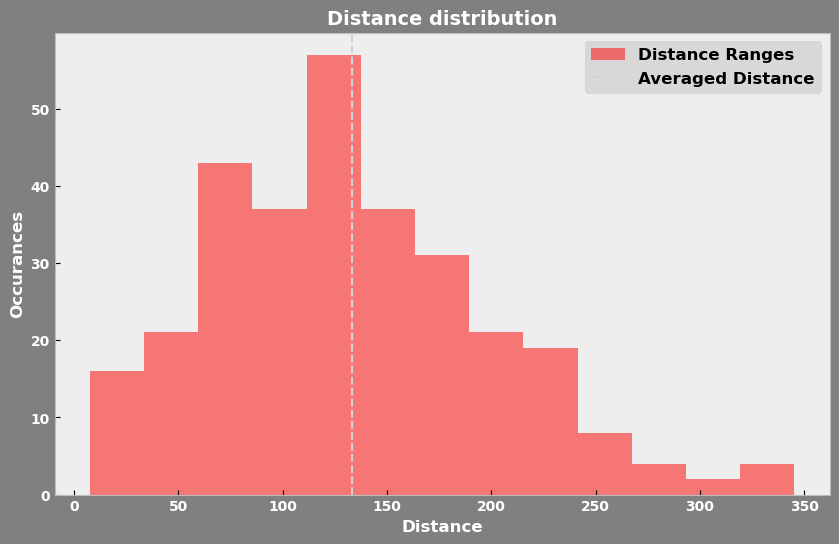

In [16]:
# Plotting the distribution of the distance
plt.figure(figsize = (10, 6), facecolor = "gray")
plt.hist(total_distance, bins = "auto", label = "Distance Ranges", color = "red", alpha = 0.5)
plt.axvline(avg_distance, color = "lightgrey", linewidth = 1.5, label = "Averaged Distance", linestyle = "--")
plt.title("Distance distribution", fontweight = "bold", fontsize = 14, color = "white")
plt.ylabel("Occurances", fontweight = "bold", fontsize = 12, color = "white")
plt.xlabel("Distance", fontweight = "bold", fontsize = 12, color = "white")
plt.xticks(fontweight = "bold", color = "white")
plt.yticks(fontweight = "bold", color = "white")
plt.legend(facecolor = "lightgray", fontsize = "large")
plt.setp(plt.gca().get_legend().get_texts(), weight = "bold", color = "black")
plt.grid(False)
plt.show()